In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, lzma, csv, bz2
import tilemapbase
import numpy as np

#datadir = os.path.join("/media", "disk", "Data")
datadir = os.path.join("..", "..", "..", "..", "Data")

# The input data

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

We use the `opencrimedata` package we have developed.

In [5]:
import opencrimedata.chicago as chicago
import opencrimedata
print(opencrimedata.__version__)

0.1.0


In [6]:
filename = os.path.join(datadir, "chicago_all.csv.xz")
def gen():
    with lzma.open(filename, "rt", encoding="UTF8") as f:
        yield from chicago.load_only_with_point(f)
        
next(gen())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.531655723, 41.698387427))

In [12]:
coords_wm = np.asarray([tilemapbase.project(*row.point) for row in gen() if row.crime_type=="BURGLARY"])

In [13]:
def gen_new():
    fn = os.path.join(datadir, "chicago_redist_network_flow_to_buildings_network.csv.xz")
    with lzma.open(fn, "rt", encoding="UTF8") as f:
        yield from chicago.load_only_with_point(f)
        
coords_new_wm = np.asarray([tilemapbase.project(*row.point) for row in gen_new() if row.crime_type=="BURGLARY"])

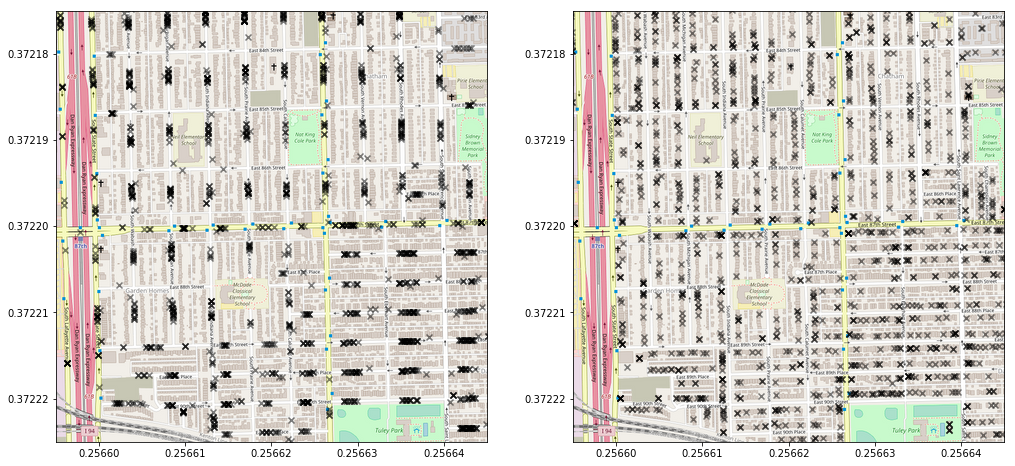

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(17,8))

ex = tilemapbase.Extent.from_centre(0.25662, 0.3722, xsize=0.00005)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
for ax in axes:
    plotter.plot(ax)
axes[0].scatter(*coords_wm.T, marker="x", color="black", alpha=0.5)
axes[1].scatter(*coords_new_wm.T, marker="x", color="black", alpha=0.5)
None

In [16]:
fig.savefig("Chicago_overview.png", dpi=150)

## Chicago regions

We also use some code from [`open_cp`](https://github.com/QuantCrimAtLeeds/PredictCode) and the geographical data available at

https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

Download in geojson format.

In [7]:
import open_cp.sources.chicago as chicago
chicago.set_data_directory(datadir)

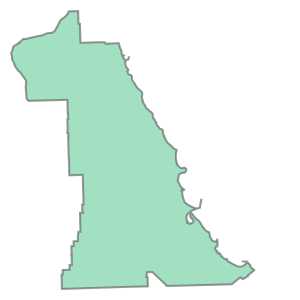

In [8]:
chicago.get_side("South")